# Excitation Generation via Autoregressive Moving Average (ARMA)

In this example we will go into detail and show how to generate motivating time series data from a Autoregressive Moving Average (ARMA) model with random params.

Since generating sequential data solely by sampling from a mixed distribution tends to be inherently random, we further improve the quality of our data generation by leveraging the fundamentals of time series analysis and modeling. Specifically, we employ stochastically parameterized ARMA models to produce time series data that combines both randomness and periodic fluctuations.

The ARMA($p$, $q$) model consists of an autoregressive model AR($p$) and a moving average model MA($q$). The autoregressive component AR($p$) captures historical information of the time series, thereby reflecting past fluctuations, while the moving average component MA($q$) represents a weighted average of Gaussian sequences, introducing randomness into the time series. The model can be expressed as:
$$
{{Y}_{t}}={{\phi }_{1}}{{Y}_{t-1}}+{{\phi }_{2}}{{Y}_{t-2}}+\cdots +{{\phi }_{p}}{{Y}_{t-p}}+{{e}_{t}}-{{\theta }_{1}}{{e}_{t-1}}-{{\theta }_{2}}{{e}_{t-2}}-\cdots -{{\theta }_{q}}{{e}_{t-q}},
$$
Here, $p$ and $q$ represent the orders of the autoregressive model and the moving average model, respectively, while $\phi_p$ and $\theta_q$ denote the parameters of the autoregressive and moving average processes, respectively. In generating this excitation sequence, we aim to produce a sampled excitation time series by randomly generating the parameters of the ARMA($p$, $q$) model.

Considering that the autoregressive process can easily lead to excessive accumulation of historical information and cause numerical explosion, we impose constraints on the parameters of the autoregressive model to ensure the generation of as stationary a time series as possible. The specific constraints are as follows:

$$
\left.\begin{matrix}
\phi_1 + \phi_2 + \cdots + \phi_p < 1 \\
|\phi_p| < 1
\end{matrix}\right\}
$$

Below, we will further demonstrate how to use this model to generate excitation time series data.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from S2Generator.excitation import AutoregressiveMovingAverage

# Create the instance for Autoregressive Moving Average
arma = AutoregressiveMovingAverage(
    p_min=1,
    p_max=3,  # The order for AR
    q_min=1,
    q_max=3,  # The order for MA
)

# Generate the excitation through `generate` method
time_series = arma.generate(
    rng=np.random.RandomState(0), input_dimension=1, n_inputs_points=256
)

print(
    f"The Excitation Method: {str(arma)} and Generate the Time Series Data with Shape: {time_series.shape}"
)

The Excitation Method: ARMA and Generate the Time Series Data with Shape: (256, 1)


Then, we visualize the generated time series data. We can also check the order and params of AR($p$) and MA($q$) models.

The order of ARMA(p, q) model: {'AR(p)': 1, 'MA(q)': 2}
The params of ARMA(p, q) model: {'AR(p)': array([0.42607495]), 'MA(q)': array([0.20552675, 0.08976637])}


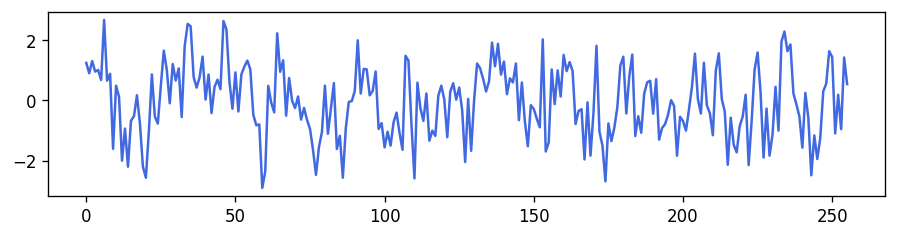

In [2]:
# # Visualization for the excitation
fig, ax = plt.subplots(figsize=(9, 2), dpi=120)

ax.plot(time_series, color="royalblue")

# Check the order
print("The order of ARMA(p, q) model:", arma.order)
print("The params of ARMA(p, q) model:", arma.params)

We can also generate autoregression moving average model sampling time series data of multiple dimensions (multivariate) at once:

The Excitation Method: ARMA and Generate the Time Series Data with Shape: (512, 4)


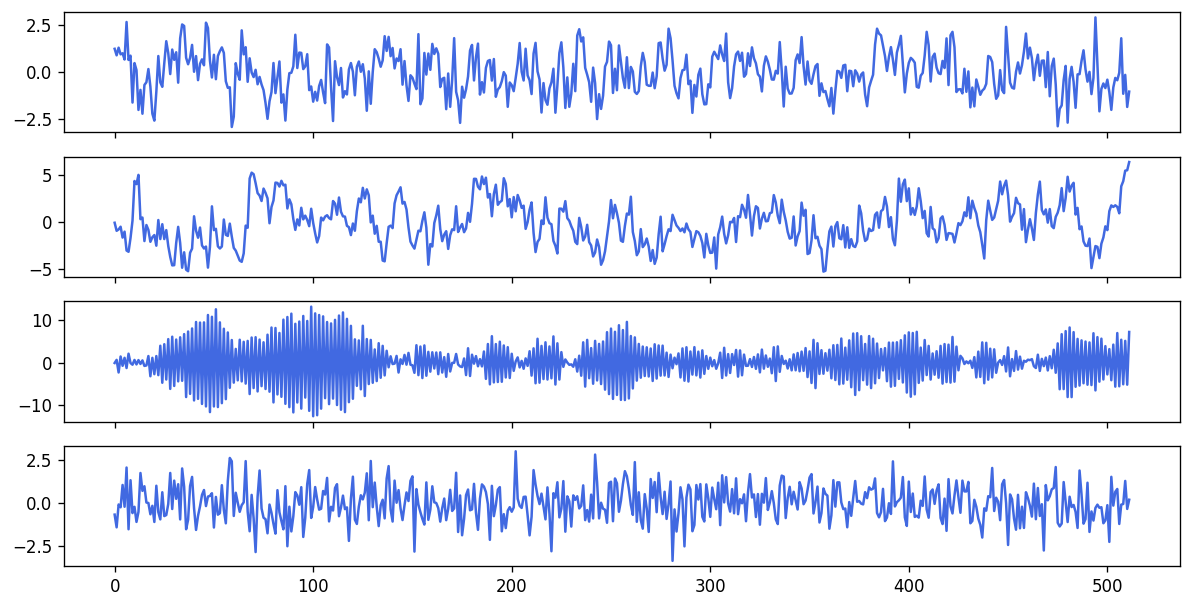

In [3]:
# Generate the multi-dimension time series data
time_series = arma.generate(
    rng=np.random.RandomState(0), input_dimension=4, n_inputs_points=512
)
print(
    f"The Excitation Method: {str(arma)} and Generate the Time Series Data with Shape: {time_series.shape}"
)

# Visualize the multi-dimension time series data
fig, ax = plt.subplots(4, 1, figsize=(12, 6), dpi=120, sharex=True)
for i in range(4):
    ax[i].plot(time_series[:, i], color="royalblue")

To make it easier to use, we have provided an interface for generating specific parameters. Simply input the specified order to generate the model parameters. This makes it easier for users to generate ARMA models of a specified order.

AR params: [0.43037873 0.20552675 0.09665074]
MA params: [-0.1526904   0.29178823  0.0888687 ]


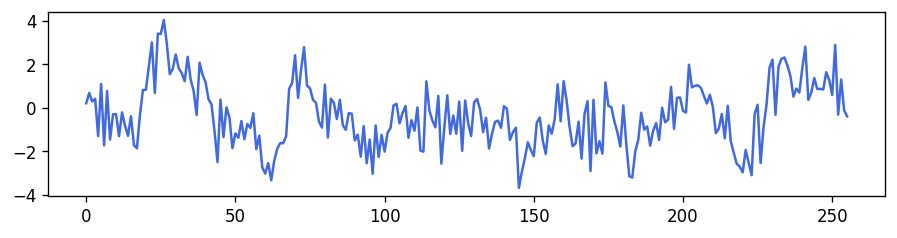

In [4]:
rng = np.random.RandomState(0)

# Generate the params for AR
ar_params = arma.create_autoregressive_params(rng=rng, p_order=3)
print("AR params:", ar_params)

# Generate the params for MA
ma_params = arma.create_autoregressive_params(rng=rng, p_order=3)
print("MA params:", ma_params)

# Create a zero time series
time_series = np.zeros(256)

# Generate the excitation
time_series = arma.arma_series(
    rng=rng, p_params=ar_params, q_params=ma_params, time_series=time_series
)

# # Visualization for the excitation
fig, ax = plt.subplots(figsize=(9, 2), dpi=120)

ax.plot(time_series, color="royalblue")